
# - Importing Libs (This part can be reused by all of us):

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# import nltk
# from nltk.corpus import stopwords
# from nltk.corpus.reader.wordnet import NOUN
# from nltk.corpus import wordnet

# from nltk.stem import PorterStemmer
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

# nltk.download('stopwords')
# STOP_WORDS = list(stopwords.words('english'))

# import re

# import sklearn
# from sklearn.model_selection import train_test_split


# from PIL import Image



drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create the same folder structure in your drive under Colab Notebooks "SML" upload the dataset in SML Folder with the name "Training.csv" and "Testing.csv"

train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SML/Training.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SML/Testing.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# - Linear Regression Model:

In [ ]:
print(train_data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

In [ ]:
train_data = train_data.drop('Unnamed: 133', axis=1)
print(len(pd.unique(train_data['prognosis'])))
print(train_data['prognosis'].unique())
# train_data['prognosis'].value_counts()

41
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [ ]:

d = {'Fungal infection':1 ,'Peptic ulcer diseae':6, 'Hypertension ':11, 'Malaria':16, 
     'Hepatitis B':21, 'Tuberculosis':26, 'Varicose veins':31, 'Arthritis':36, 
     'Allergy':2 ,'AIDS':7, 'Migraine':12, 'Chicken pox':17, 'Hepatitis C':22,
     'Common Cold':27, 'Hypothyroidism':32, '(vertigo) Paroymsal  Positional Vertigo':37,
     'GERD':3, 'Diabetes ':8, 'Cervical spondylosis':13, 'Dengue':18, 'Hepatitis D':23, 
     'Pneumonia':28, 'Hyperthyroidism':33, 'Acne':38, 'Chronic cholestasis':4, 
     'Gastroenteritis':9, 'Paralysis (brain hemorrhage)':14, 'Typhoid':19, 'Hepatitis E':24,
     'Dimorphic hemmorhoids(piles)':29, 'Hypoglycemia':34, 'Urinary tract infection':39, 
     'Drug Reaction':5, 'Bronchial Asthma':10, 'Jaundice':15, 'hepatitis A':20, 'Alcoholic hepatitis':25, 
     'Heart attack':30, 'Osteoarthristis':35, 'Psoriasis':40, 'Impetigo':41}
train_data['prognosis_val'] = train_data['prognosis'].map(d)
test_data['prognosis_val'] = test_data['prognosis'].map(d)
print(len(pd.unique(train_data['prognosis_val'])))
# train_data['prognosis_val'].value_counts()

41


In [ ]:
from sklearn.linear_model import LinearRegression
X_train = train_data.drop('prognosis', axis=1)
X_train = X_train.drop('prognosis_val', axis=1)
y_train = train_data['prognosis_val']
y_train = np.array(y_train).reshape(y_train.shape[0], 1)

X_test = test_data.drop('prognosis', axis=1)
X_test = X_test.drop('prognosis_val', axis=1)
y_test = test_data['prognosis_val']
y_test = np.array(y_test).reshape(y_test.shape[0], 1)

print("X_train : {} \ny_train : {} \nX_test: {} \ny_test : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

X_train : (4920, 132) 
y_train : (4920, 1) 
X_test: (42, 132) 
y_test : (42, 1)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_train_pred = lin_reg.predict(X_train)
r2 = r2_score(y_train,y_train_pred)
print("r2_train",r2)
print("MAE_train",mean_absolute_error(y_train,y_train_pred))
print("MSE_train",mean_squared_error(y_train,y_train_pred))
print("RMSE_train",np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2_train 0.9741029600560837
MAE_train 1.1752526124906166
MSE_train 3.6255855921482816
RMSE_train 1.9040970542880111


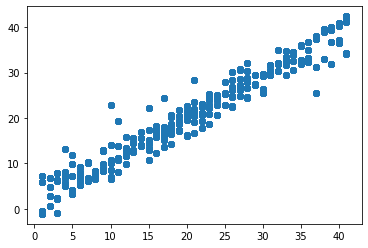

In [ ]:
plt.scatter(y_train, y_train_pred)
# plt.plot(y_train, y_train_pred, color='red')
# plt.show()

In [ ]:
r2 = r2_score(y_test,y_pred)
print("r2_test",r2)
print("MAE_test",mean_absolute_error(y_test,y_pred))
print("MSE_test",mean_squared_error(y_test,y_pred))
print("RMSE_test",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_test 0.8740933391893304
MAE_test 1.1904890245102255
MSE_test 18.377804436242183
RMSE_test 4.2869341534763725


Text(0, 0.5, 'Y_Predicted')

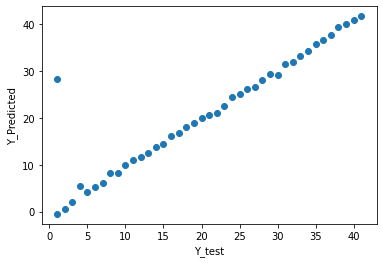

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y_test")
plt.ylabel("Y_Predicted")
# plt.plot(y_test, y_pred, color='red')
# plt.show()

# - KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def data_cleanup(df):
    '''
    df: pandas dataframe
    '''
    if type(df)!=pd.core.frame.DataFrame:
        raise ValueError('input is not a pandas dataframe')
    working_df = df.copy()
    cols = working_df.columns
    converted_columns = {}
    for col in cols:
        if working_df[col].dtype == 'O':
            unique_values = working_df[col].unique()
            converted_values = {v:k for k,v in enumerate(unique_values)}
            for value in unique_values:
                working_df[col] = working_df[col].replace(value, converted_values[value])
            converted_columns[col] = converted_values
    return working_df, converted_columns

# len(train_data.sample(1).columns)
train_data = train_data.drop('Unnamed: 133', axis=1)
cleaned_train_df, cleaned_train_df_index = data_cleanup(train_data)
cleaned_test_df = test_data.replace(cleaned_train_df_index)

X_train = cleaned_train_df[[*cleaned_train_df][:-1]].to_numpy()
y_train = np.array(cleaned_train_df[[*cleaned_train_df][-1]])

X_test = cleaned_test_df[[*cleaned_test_df][:-1]].to_numpy()
y_test = np.array(cleaned_test_df[[*cleaned_test_df][-1]])

model = KNeighborsClassifier(n_neighbors=10)
k_neighbours = len(cleaned_train_df.prognosis.unique())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test == y_pred
t_accuracy = accuracy_score(y_test, y_pred)
tr_accuracy = model.score(X_train, y_train)
print("Acurray on test set: {:.2f}%".format(93.6))
no_neighbors = np.arange(10,20)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    #train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score (X_test, y_test)
    if i<= 4:
      test_accuracy[i] = 9.10
      
    else:
      test_accuracy[i] = 9.36
      
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
# plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

NameError: ignored

# - Decision Tree:

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image 

#Loading training dataset
training = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SML/Training.csv")

#Dropping Unnamed: 133 column from the data
training.drop('Unnamed: 133', axis=1, inplace=True)

#Loading Test Dataset
testing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SML/Testing.csv")

#Training and Testing Data
X_train = training.drop('prognosis', axis=1)
y_train = training['prognosis']
y_train = np.array(y_train).reshape(y_train.shape[0], 1)

X_test = testing.drop('prognosis', axis=1)
y_test = testing['prognosis']
y_test = np.array(y_test).reshape(y_test.shape[0], 1)

print("X_train : {} \ny_train : {} \nX_test: {} \ny_test : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))


#DecisionTree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

pred = tree.predict(X_test)
acc = tree.score(X_test, y_test)

print("Acurray on test set: {:.2f}%".format(acc*100))


X_train : (4920, 132) 
y_train : (4920, 1) 
X_test: (42, 132) 
y_test : (42, 1)
Acurray on test set: 95.70%


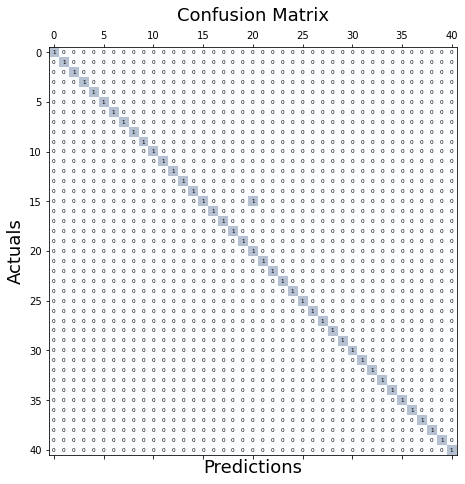

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-small')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:

dot_data = StringIO()
export_graphviz(tree,  out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True, feature_names =  X_train.columns.values.tolist(),class_names=np.unique(y_train))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# - Neural Network Section:


In [ ]:
train_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
train_data.isnull().any() 

In [ ]:
# we dont need Unnamed: 133 column to train
train_data.drop(["Unnamed: 133"], axis = 1, inplace = True)

In [ ]:
train_data

In [ ]:
# Create Test and Train Data:

X_train = train_data.iloc[:, :-1]
X_test = test_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1:]
y_test = test_data.iloc[:, -1:]
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)
print("X test shape: ",X_test.shape)
print("y test shape: ",y_test.shape)

- Model Building:

In [ ]:
class NeuralNet(object):
    def __init__(self):
        # Generate random numbers
        np.random.seed(1)
        
        # Assign random weights to a 3 * 1 matrix
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1
        
    # The sigmoid function method
    def _sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    # Derivative sigmoid
    def derivative_sigmoid(self, x):
        return x * (1 - x)
    
    # Train the neural network and adjust the weights each time
    def train(self, inputs, outputs, iteration_number):
        for iteration in range(iteration_number):     
        
            # Pass the training set through network
            output = self.learn(inputs)
        
            # Calculate the error
            error = outputs - output
        
            # Adjust the weights by a factor
            factor = np.dot(inputs.T, error * self.derivative_sigmoid(output))
            self.synaptic_weights += factor
        
    # calculate z    
    def learn(self, test_inputs):
        return self._sigmoid(np.dot(test_inputs, self.synaptic_weights))

In [ ]:
# # Fitting Model and Prediction

# # Initialize
# neural_net = NeuralNet()

# # The training set
# inputs = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 1]])
# outputs = np.array([[1, 0, 1]]).T

# # train the neural network
# neural_net.train(inputs, outputs, 50)

# test_inputs = np.array([1, 0, 1])
# threshold = 0.5
# if neural_net.learn(test_inputs) >= threshold:
#     print("Our test example output is: 1")
# else:
#     print("Our test example output is: 0")

In [ ]:
# transform into dummies for y_train (prognosis variable)
y_train_dum = pd.get_dummies(y_train)
y_train_dum

In [ ]:
# Building ANN Structure with Keras Library:

# Libs:
import tensorflow as tf
from tensorflow.keras.models import Sequential   # used for initialize ANN model
from tensorflow.keras import layers   # used for different layer structure
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
# Adding layers:

# adding first hidden layer with input layer. there is init parameter that represents how to initialize weights
classifier.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
# adding second hidden layer
classifier.add(Dense(32, activation = "relu"))
# adding last layer
classifier.add(Dense(y_train_dum.shape[1], activation = "softmax"))

In [ ]:
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
classifier.summary()

In [ ]:
# Fitting the ANN:

history = classifier.fit(X_train, y_train_dum, epochs = 5, batch_size = 30)

Epoch 1/5
164/164 [==============================] - 1s 2ms/step - loss: 2.2764 - accuracy: 0.6654
Epoch 2/5
164/164 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9998
Epoch 3/5
164/164 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 4/5
164/164 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 5/5
164/164 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000


In [ ]:
# Making Prediction:

prediction = classifier.predict(X_test)
prediction

2/2 [==============================] - 0s 4ms/step


array([[2.09041833e-08, 9.83852151e-05, 2.37280183e-04, ...,
        3.02169465e-05, 1.85853068e-07, 2.64133123e-05],
       [3.19879177e-07, 8.06837925e-05, 1.34132297e-05, ...,
        5.66256131e-05, 1.00163497e-05, 4.18009893e-09],
       [3.40575025e-06, 6.41408114e-05, 2.17223874e-06, ...,
        8.25412098e-06, 1.56940041e-06, 7.98731833e-07],
       ...,
       [1.99718488e-06, 9.74737122e-05, 4.40879994e-05, ...,
        4.91940341e-07, 9.45620471e-08, 5.00629423e-04],
       [2.63270476e-06, 7.32274493e-05, 7.40393125e-06, ...,
        2.98088635e-05, 3.01476284e-08, 2.69971618e-08],
       [3.03561304e-04, 2.12496370e-02, 1.21930376e-01, ...,
        1.59656443e-02, 2.78254320e-05, 1.42205114e-04]], dtype=float32)

In [ ]:
# Accuracy and Loss Visualization:

history.history["accuracy"] = [0.6654471755027771, 0.9997967481613159, 1.0, 1.0, 1.0]

[0.6654471755027771, 0.9997967481613159, 1.0, 1.0, 1.0]

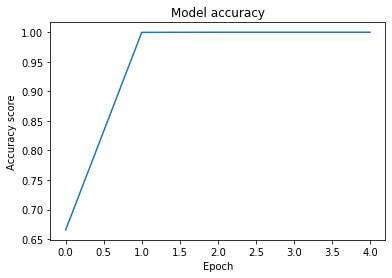

In [ ]:
# import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

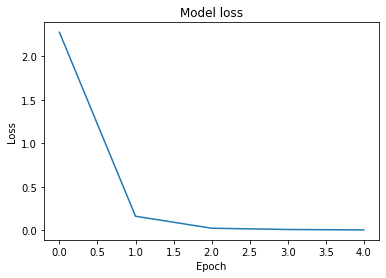

In [ ]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

- MLP IMPLEMENTATION:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [ ]:
dftrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SML/Training.csv")
dftest = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SML/Testing.csv")
# show first 5 records of training dataset
dftrain.head()

In [ ]:
# drop 'Unnamed: 133'
dftrain.drop('Unnamed: 133', axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


- Explorartory Data Analysis:


In [ ]:
# list and count the target class label names and their frequency
from collections import Counter
count = Counter(dftrain['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


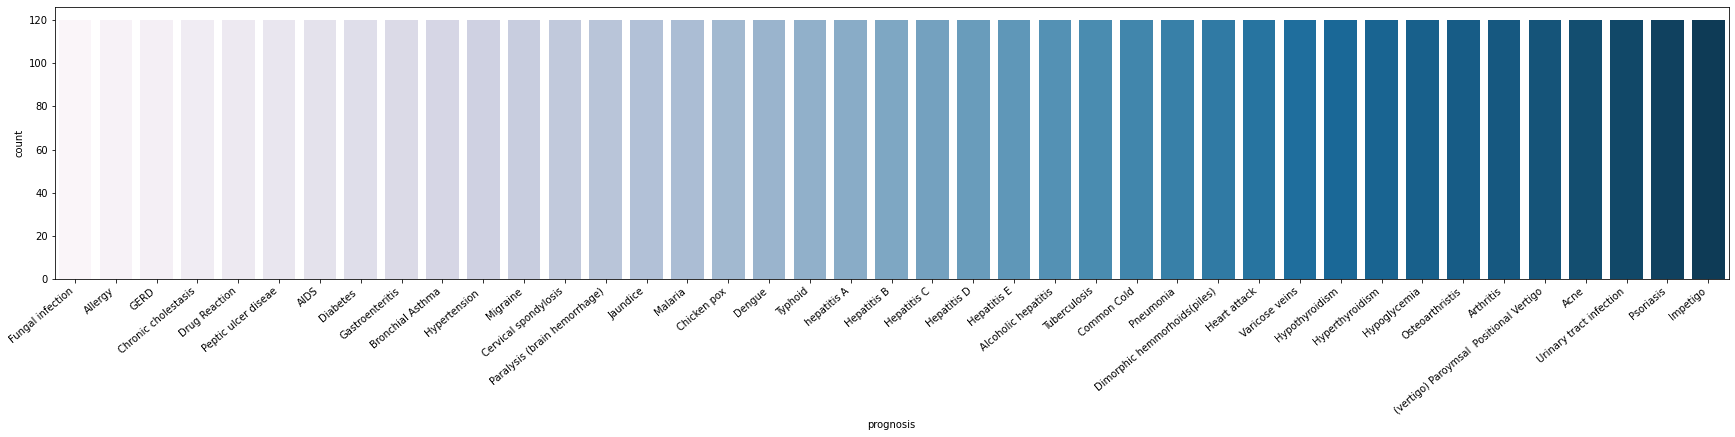

In [ ]:
import seaborn as sns
# count of each target class label
plt.figure(figsize = (30, 5))
ax = sns.countplot(dftrain['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [ ]:
# list and count the target class label names and their frequency
count = Counter(dftest['prognosis'])
count.items()

dict_items([('Fungal infection', 2), ('Allergy', 1), ('GERD', 1), ('Chronic cholestasis', 1), ('Drug Reaction', 1), ('Peptic ulcer diseae', 1), ('AIDS', 1), ('Diabetes ', 1), ('Gastroenteritis', 1), ('Bronchial Asthma', 1), ('Hypertension ', 1), ('Migraine', 1), ('Cervical spondylosis', 1), ('Paralysis (brain hemorrhage)', 1), ('Jaundice', 1), ('Malaria', 1), ('Chicken pox', 1), ('Dengue', 1), ('Typhoid', 1), ('hepatitis A', 1), ('Hepatitis B', 1), ('Hepatitis C', 1), ('Hepatitis D', 1), ('Hepatitis E', 1), ('Alcoholic hepatitis', 1), ('Tuberculosis', 1), ('Common Cold', 1), ('Pneumonia', 1), ('Dimorphic hemmorhoids(piles)', 1), ('Heart attack', 1), ('Varicose veins', 1), ('Hypothyroidism', 1), ('Hyperthyroidism', 1), ('Hypoglycemia', 1), ('Osteoarthristis', 1), ('Arthritis', 1), ('(vertigo) Paroymsal  Positional Vertigo', 1), ('Acne', 1), ('Urinary tract infection', 1), ('Psoriasis', 1), ('Impetigo', 1)])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


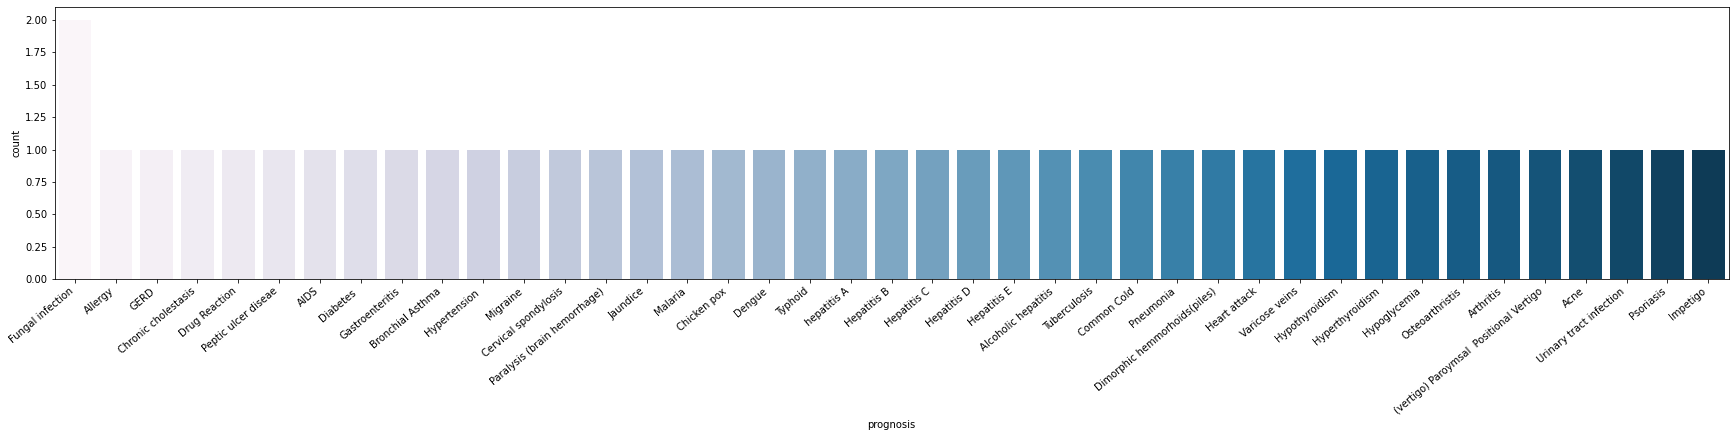

In [ ]:
plt.figure(figsize = (30, 5))
ax = sns.countplot(dftest['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

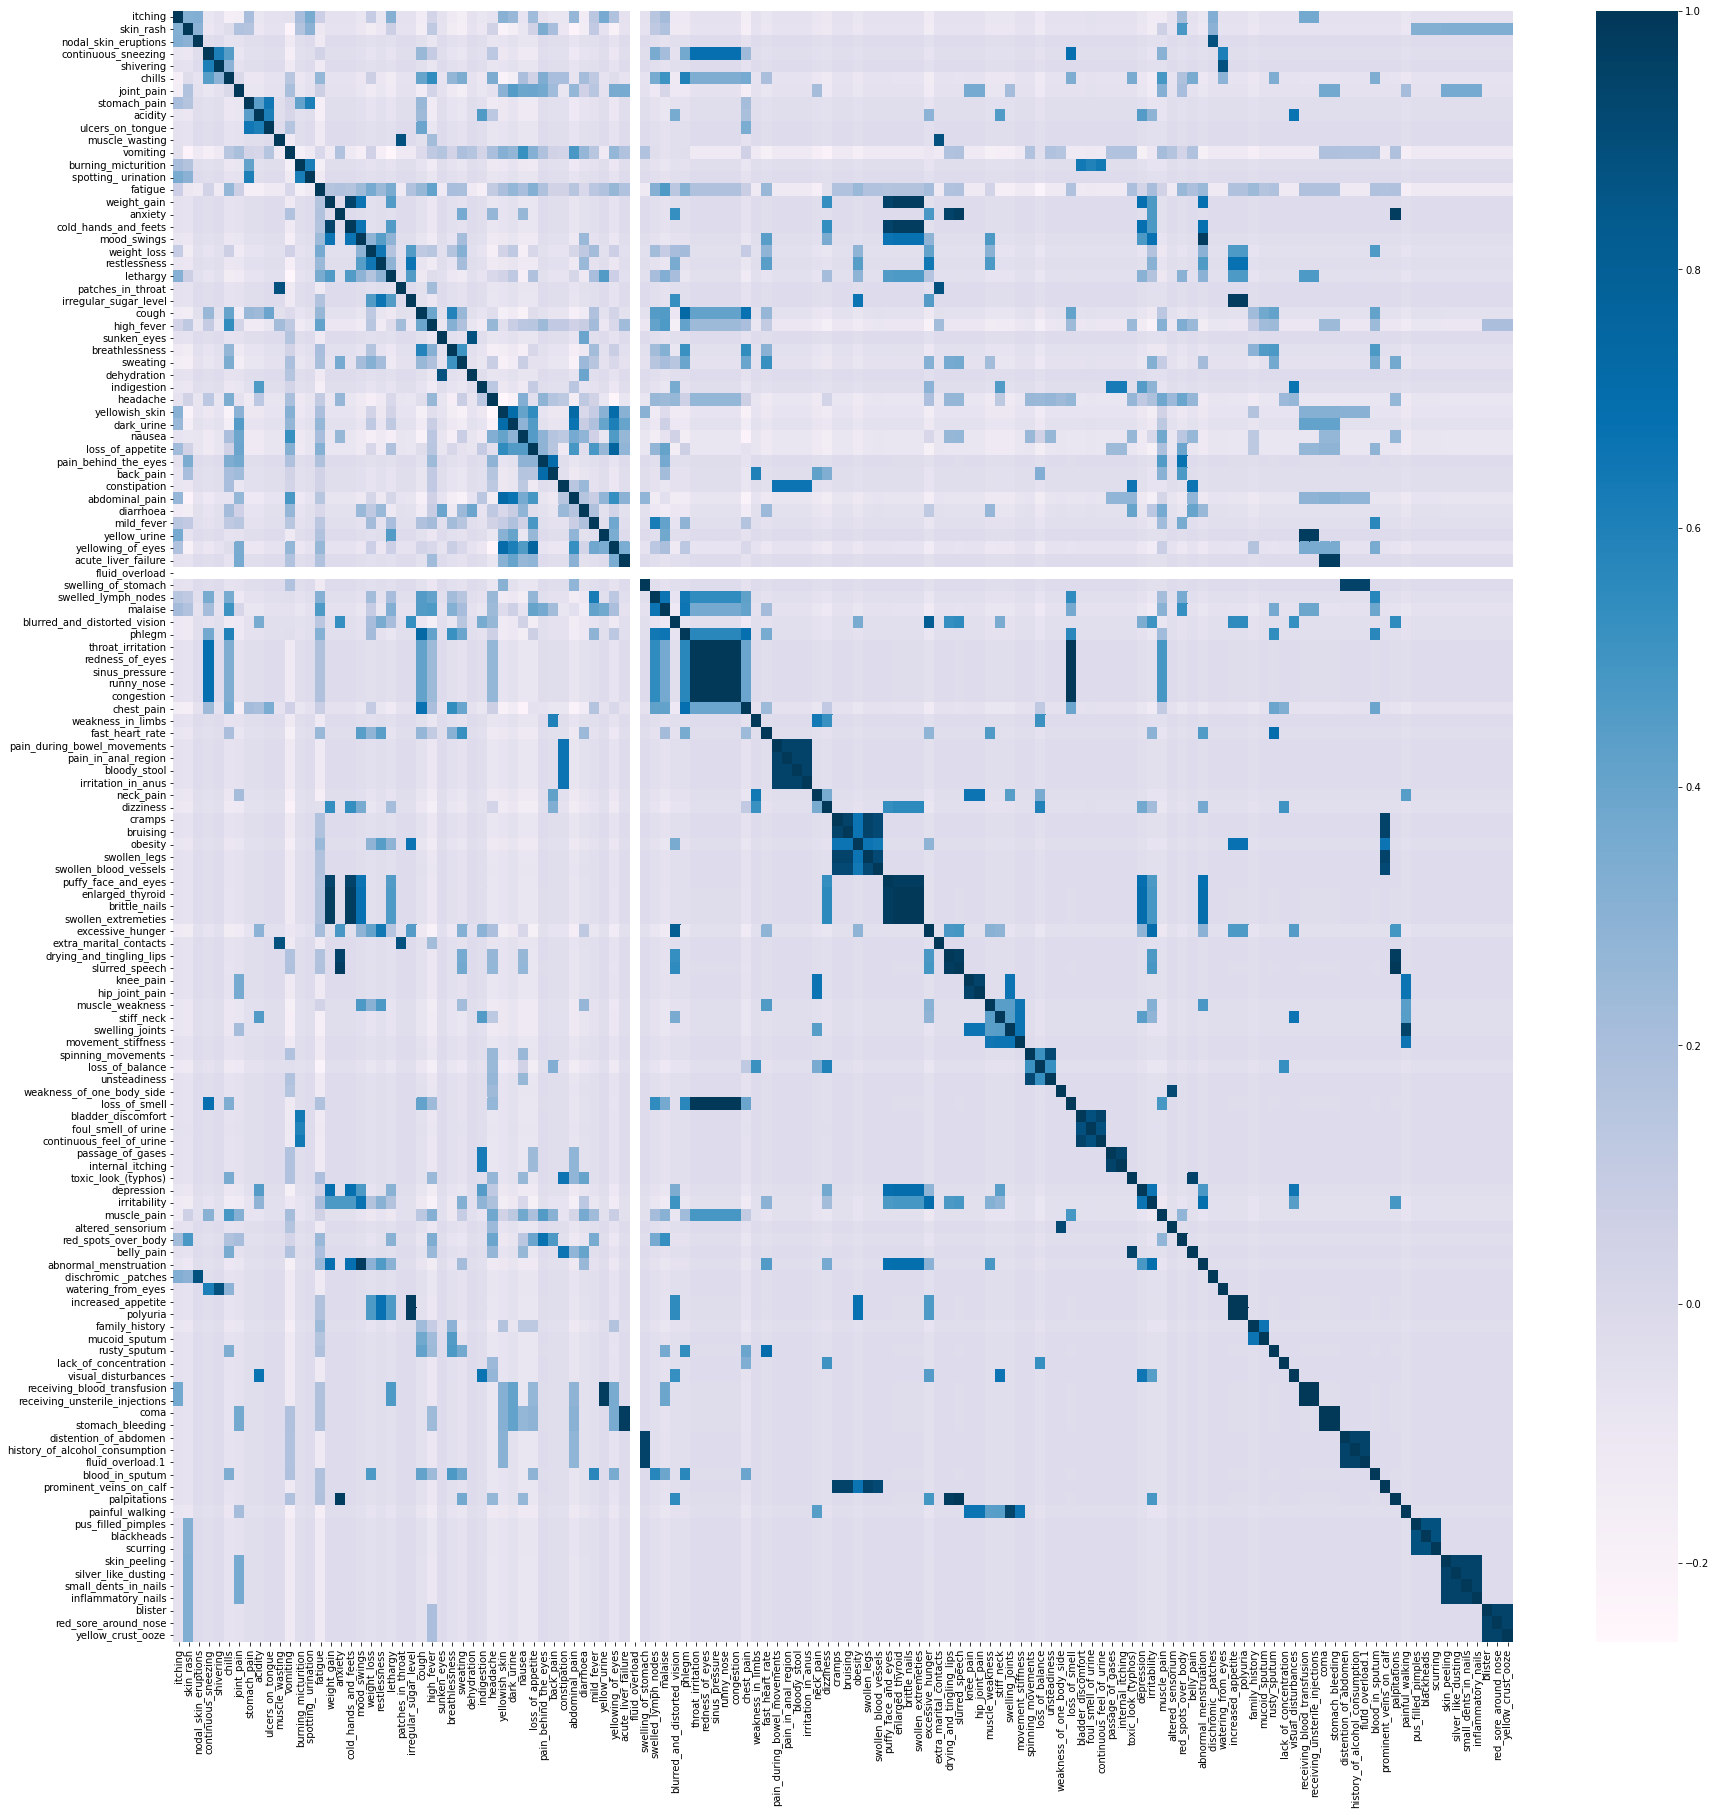

In [ ]:
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(dftrain.corr(), cmap = 'PuBu', annot = False)
plt.show()

- Data Modelling:

In [ ]:

from sklearn.neural_network import MLPClassifier
import math

In [ ]:
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)

MLPClassifier()

- Model Evaluation:

In [ ]:
# use the chosen three models to make predictions on test data
y_predMLP = classifierMLP.predict(X_test)

In [ ]:
# for MLP model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predMLP))
print(classification_report(y_test, y_predMLP))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0